In [1]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline
# set the font globally
plt.rcParams.update({'font.family':'Arial'})
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2
# update the overall font size
plt.rcParams.update({'font.size':11})
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# Binary Dataset

In [2]:
# Load the binary 50/50 split dataset
data = pd.read_csv('data/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
# Identify binary columns (assuming binary columns are of type int and have only two unique values: 0 and 1)
binary_columns = [col for col in data.columns if data[col].dropna().apply(lambda x: x in [0, 1]).all()]

# Non-binary columns
non_binary_columns = data.columns.difference(binary_columns)

# Initialize MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Normalize non-binary columns
data[non_binary_columns] = scaler.fit_transform(data[non_binary_columns])

# Display the first few rows of the normalized dataframe
data.head()


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,0.162791,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.50,0.166667,1.000000,0.0,1.0,0.250000,1.0,1.0
1,0.0,1.0,1.0,1.0,0.162791,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.50,0.000000,0.000000,0.0,1.0,0.916667,1.0,1.0
2,0.0,0.0,0.0,1.0,0.162791,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.00,0.000000,0.333333,0.0,1.0,1.000000,1.0,1.0
3,0.0,1.0,1.0,1.0,0.186047,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.50,0.000000,0.100000,0.0,1.0,0.833333,1.0,1.0
4,0.0,0.0,0.0,1.0,0.197674,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.25,0.000000,0.000000,0.0,0.0,0.583333,0.8,1.0


In [3]:
# Separate features and target
X_binary = data.drop('Diabetes_binary', axis=1)
y_binary = data['Diabetes_binary']

In [4]:
# PCA
pca = PCA(n_components=2)
X_pca_binary = pca.fit_transform(X_binary)


In [5]:
# t-SNE
tsne = TSNE(n_components=2, random_state=42, n_jobs = -1, n_iter = 500 )
X_tsne_binary = tsne.fit_transform(X_binary)

In [6]:
# UMAP
umap_model = umap.UMAP(n_jobs = -1)
X_umap_binary = umap_model.fit_transform(X_binary)

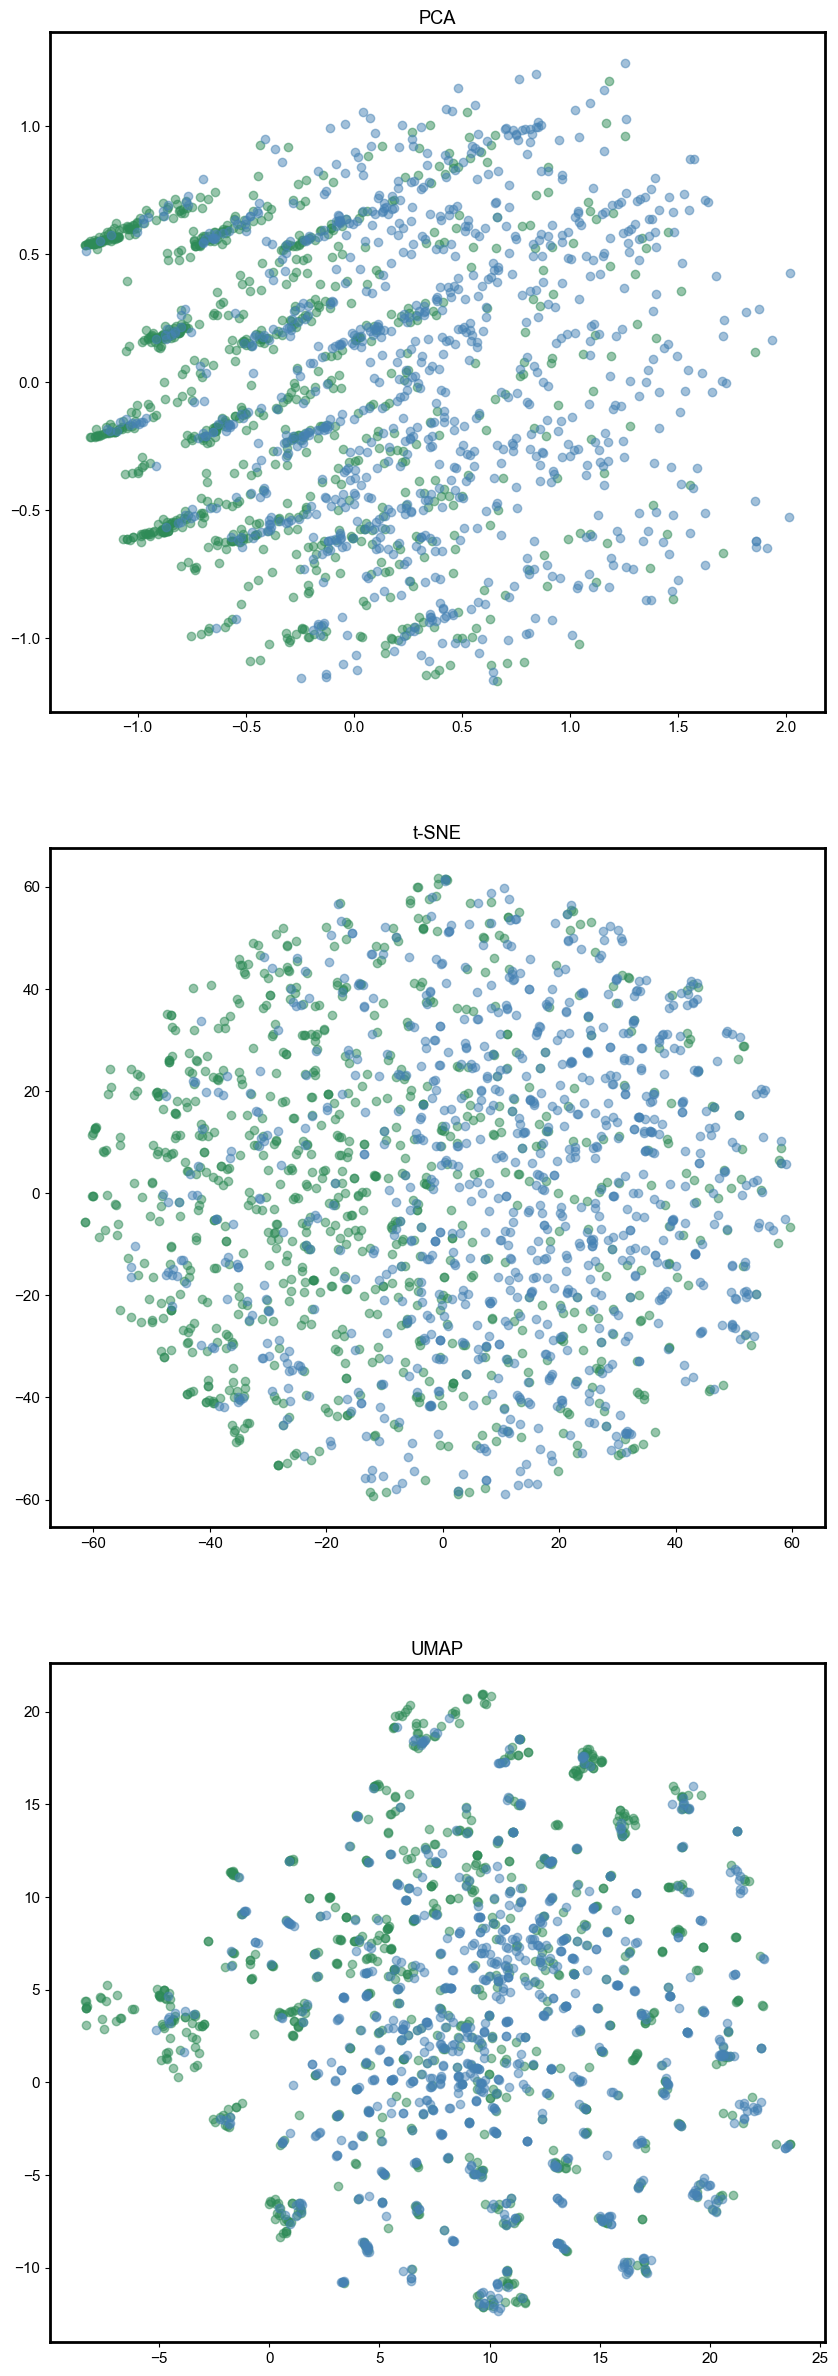

In [7]:
sample_indices = np.random.choice(X_pca_binary.shape[0], size=int(X_pca_binary.shape[0] * 0.025), replace=False)

# Plotting
fig, ax = plt.subplots(3, 1, figsize=(10, 30))

# PCA Plot
ax[0].scatter(X_pca_binary[sample_indices][y_binary[sample_indices] == 0][:, 0], X_pca_binary[sample_indices][y_binary[sample_indices] == 0][:, 1], color='seagreen', alpha=0.5)
ax[0].scatter(X_pca_binary[sample_indices][y_binary[sample_indices] == 1][:, 0], X_pca_binary[sample_indices][y_binary[sample_indices] == 1][:, 1], color='steelblue', alpha=0.5)
ax[0].set_title('PCA')

# t-SNE Plot
ax[1].scatter(X_tsne_binary[sample_indices][y_binary[sample_indices] == 0][:, 0], X_tsne_binary[sample_indices][y_binary[sample_indices] == 0][:, 1], color='seagreen', alpha=0.5)
ax[1].scatter(X_tsne_binary[sample_indices][y_binary[sample_indices] == 1][:, 0], X_tsne_binary[sample_indices][y_binary[sample_indices] == 1][:, 1], color='steelblue', alpha=0.5)
ax[1].set_title('t-SNE')

# UMAP Plot
ax[2].scatter(X_umap_binary[sample_indices][y_binary[sample_indices] == 0][:, 0], X_umap_binary[sample_indices][y_binary[sample_indices] == 0][:, 1], color='seagreen', alpha=0.5)
ax[2].scatter(X_umap_binary[sample_indices][y_binary[sample_indices] == 1][:, 0], X_umap_binary[sample_indices][y_binary[sample_indices] == 1][:, 1], color='steelblue', alpha=0.5)
ax[2].set_title('UMAP')

plt.savefig("figures/Dim Reduction Binary.svg")
plt.show()
